In [1]:
import pandas as pd
import numpy as np

In [2]:
part_d_df = pd.read_csv('data/part_d_2013.csv', low_memory=False)
exclusion_df = pd.read_csv('data/exclusion_list_2014.csv', low_memory=False)
print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (23645873, 21)


In [3]:
part_d_df.head(2)

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,...,total_30_day_fill_count,total_day_supply,total_drug_cost,bene_count_ge65,bene_count_ge65_suppress_flag,total_claim_count_ge65,ge65_suppress_flag,total_30_day_fill_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
0,1003049925,BEST,DAWN,GLENNS FERRY,ID,Nurse Practitioner,S,NEXIUM,ESOMEPRAZOLE MAGNESIUM,NaN,...,24.0,720,5353.41,NaN,*,NaN,*,NaN,NaN,NaN
1,1003049925,BEST,DAWN,GLENNS FERRY,ID,Nurse Practitioner,S,OMEPRAZOLE,OMEPRAZOLE,18.0,...,108.0,3240,1493.91,NaN,#,56.0,NaN,70.0,2100.0,956.83


In [4]:
exclusion_df.head(2)
len(exclusion_df)

566

In [5]:
# reorganize data columns
part_d_df = part_d_df[['npi', 'nppes_provider_city','nppes_provider_state', 'specialty_description', 'description_flag',\
                        'drug_name', 'generic_name', 'bene_count', 'total_claim_count','total_day_supply', \
                        'total_drug_cost', 'bene_count_ge65', 'total_claim_count_ge65', 'total_day_supply_ge65',\
                        'total_drug_cost_ge65']]

# assigning exclusion (False = 0, True = 1)
exclusion_npi = exclusion_df['NPI'].values.tolist()

part_d_df['is_excluded'] = 0
part_d_df.loc[part_d_df['npi'].isin(exclusion_npi), 'is_excluded'] = 1

# get US data to analyze
states = ['AK', 'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', \
          'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', \
          'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', \
          'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', \
          'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI',' WY']

part_d_df = part_d_df[part_d_df['nppes_provider_state'].isin(states)]

print("The data has a size of {}".format(part_d_df.shape))

The data has a size of (23233763, 16)


In [6]:
len(exclusion_df['NPI'].unique())

565

In [7]:
len(exclusion_df['SPECIALTY'].unique())

56

In [8]:
len(part_d_df.loc[part_d_df['npi'].isin(exclusion_npi)])

5748

In [9]:
part_d_df.loc[part_d_df['is_excluded']==1].head(2)

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
24496,1003801044,KENNER,LA,Internal Medicine,S,CIPROFLOXACIN HCL,CIPROFLOXACIN HCL,NaN,11,104,71.18,NaN,NaN,NaN,NaN,1
24497,1003801044,KENNER,LA,Internal Medicine,S,DILTIAZEM 24HR CD,DILTIAZEM HCL,NaN,25,990,840.47,NaN,25.0,990.0,840.47,1


In [10]:
# Top 20 states which has the most prescribers
part_d_df_state_count = part_d_df.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_state_count

,npi,nppes_provider_city,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
nppes_provider_state,,,,,,,,,,,,,,,
CA,2282144,2282144,2282144,2282144,2282144,2282144,865190,2282144,2282144,2282144,328622,1367606,1367606,1367606,2282144
NY,1626307,1626307,1626307,1626307,1626307,1626307,571115,1626307,1626307,1626307,217906,976201,976201,976201,1626307
FL,1570903,1570903,1570903,1570903,1570903,1570903,663148,1570903,1570903,1570903,221025,906968,906968,906968,1570903
TX,1436509,1436509,1436509,1436509,1436509,1436509,568033,1436509,1436509,1436509,184143,810143,810143,810143,1436509
PA,1214631,1214631,1214631,1214631,1214631,1214631,417863,1214631,1214631,1214631,157632,742763,742763,742763,1214631
OH,990148,990148,990148,990148,990148,990148,377699,990148,990148,990148,138853,583992,583992,583992,990148
NC,866187,866187,866187,866187,866187,866187,317780,866187,866187,866187,112443,500601,500601,500601,866187
IL,831102,831102,831102,831102,831102,831102,276049,831102,831102,831102,108017,503557,503557,503557,831102
MI,804781,804781,804781,804781,804781,804781,317050,804781,804781,804781,111952,432274,432274,432274,804781


In [11]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
is_excluded,,,,,,,,,,,,,,,
0,23228015,23228012,23228015,23228015,23228015,23228015,23228015,8467676,23228015,23228015,23228015,3144022,13618857,13618857,13618857
1,5748,5748,5748,5748,5748,5748,5748,1893,5748,5748,5748,854,3280,3280,3280


In [12]:
# export exclusion providers data to do statistics analysis, run once when needed by uncommenting two lines below
part_d_df_exclusion = part_d_df[part_d_df['is_excluded'] == 1]
#part_d_df_exclusion.to_csv('exclusion2017.csv')

In [13]:
len(part_d_df_exclusion['npi'].unique())

149

In [14]:
part_d_df_exclusion[['npi']].to_csv('2013_part_d_e_npi.csv')

In [15]:
len(part_d_df_exclusion['drug_name'].unique())

637

In [16]:
len(part_d_df_exclusion['specialty_description'].unique())

29

In [17]:
part_d_df_exclusion['specialty_description'].unique()

array(['Internal Medicine', 'Family Practice', 'General Surgery',
       'Psychiatry & Neurology', 'Allergy/Immunology', 'Specialist',
       'Psychiatry', 'Cardiology', 'Ophthalmology', 'Anesthesiology',
       'Emergency Medicine', 'Gastroenterology',
       'Oral Surgery (dentists only)', 'Dentist', 'Podiatry', 'CRNA',
       'Physician Assistant', 'Family Medicine', 'General Practice',
       'Pulmonary Disease', 'Geriatric Medicine', 'Obstetrics/Gynecology',
       'Nurse Practitioner', 'Pediatric Medicine', 'Orthopedic Surgery',
       'Physical Medicine and Rehabilitation', 'Urology', 'Neurosurgery',
       'Dermatology'], dtype=object)

In [18]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_exclusion_npi_count = part_d_df_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_exclusion_npi_count.reset_index(level=["npi"], inplace=True)
part_d_df_exclusion_npi_count

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,1841303310,294,294,294,294,294,294,136,294,294,294,55,193,193,193,294
1,1902829112,289,289,289,289,289,289,123,289,289,289,39,215,215,215,289
2,1942202841,240,240,240,240,240,240,103,240,240,240,25,158,158,158,240
3,1114972262,213,213,213,213,213,213,94,213,213,213,37,118,118,118,213
4,1851338248,189,189,189,189,189,189,61,189,189,189,11,121,121,121,189
5,1902845480,174,174,174,174,174,174,91,174,174,174,33,105,105,105,174
6,1700981917,146,146,146,146,146,146,60,146,146,146,17,93,93,93,146
7,1265469472,145,145,145,145,145,145,41,145,145,145,3,91,91,91,145
8,1205813441,144,144,144,144,144,144,52,144,144,144,24,86,86,86,144
9,1760558548,132,132,132,132,132,132,30,132,132,132,13,94,94,94,132


In [19]:
# Top 20 states which has the most excluded prescribers
part_d_df_exclusion_state_count = part_d_df_exclusion.groupby('nppes_provider_state').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_exclusion_state_count.reset_index(level=["nppes_provider_state"], inplace=True)
part_d_df_exclusion_state_count

,nppes_provider_state,npi,nppes_provider_city,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,CA,957,957,957,957,957,957,269,957,957,957,114,526,526,526,957
1,NJ,756,756,756,756,756,756,251,756,756,756,55,428,428,428,756
2,TN,567,567,567,567,567,567,181,567,567,567,103,349,349,349,567
3,PA,544,544,544,544,544,544,209,544,544,544,73,349,349,349,544
4,MO,439,439,439,439,439,439,167,439,439,439,61,261,261,261,439
5,MI,381,381,381,381,381,381,123,381,381,381,93,187,187,187,381
6,NY,344,344,344,344,344,344,122,344,344,344,71,189,189,189,344
7,TX,300,300,300,300,300,300,72,300,300,300,35,159,159,159,300
8,IL,242,242,242,242,242,242,81,242,242,242,27,144,144,144,242
9,VA,214,214,214,214,214,214,69,214,214,214,55,119,119,119,214


In [20]:
# Top 20 specialties which has the most excluded prescribers
part_d_df_exclusion_specialty_count = part_d_df_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_exclusion_specialty_count

,specialty_description,npi,nppes_provider_city,nppes_provider_state,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,Internal Medicine,2378,2378,2378,2378,2378,2378,801,2378,2378,2378,305,1442,1442,1442,2378
1,Family Practice,1414,1414,1414,1414,1414,1414,367,1414,1414,1414,176,761,761,761,1414
2,Psychiatry,379,379,379,379,379,379,172,379,379,379,115,225,225,225,379
3,Emergency Medicine,302,302,302,302,302,302,139,302,302,302,59,165,165,165,302
4,Cardiology,222,222,222,222,222,222,66,222,222,222,7,137,137,137,222
5,Physician Assistant,186,186,186,186,186,186,68,186,186,186,27,81,81,81,186
6,Geriatric Medicine,167,167,167,167,167,167,39,167,167,167,23,87,87,87,167
7,General Practice,158,158,158,158,158,158,50,158,158,158,32,93,93,93,158
8,General Surgery,128,128,128,128,128,128,25,128,128,128,24,85,85,85,128
9,Anesthesiology,81,81,81,81,81,81,42,81,81,81,31,47,47,47,81


After full US dataset analysis, will use NJ data to do detailed analysis

In [21]:
part_d_df_small=part_d_df[part_d_df['nppes_provider_state']=='NJ']

In [22]:
len(part_d_df_small)

648095

In [23]:
# exclusion and non-exclusion prescribers
prescribers = part_d_df_small.groupby('is_excluded').count().sort_values('npi', ascending=False).iloc[0:2]
prescribers

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65
is_excluded,,,,,,,,,,,,,,,
0,647339,647339,647339,647339,647339,647339,647339,230116,647339,647339,647339,90316,393402,393402,393402
1,756,756,756,756,756,756,756,251,756,756,756,55,428,428,428


In [24]:
# Top specialties which has the most excluded prescribers in small dataset
part_d_df_small_exclusion = part_d_df_small[part_d_df_small['is_excluded'] == 1]
part_d_df_small_exclusion_specialty_count = part_d_df_small_exclusion.groupby('specialty_description').count().sort_values('npi', ascending=False).iloc[0:20]
part_d_df_small_exclusion_specialty_count.reset_index(level=["specialty_description"], inplace=True)
part_d_df_small_exclusion_specialty_count

,specialty_description,npi,nppes_provider_city,nppes_provider_state,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
0,Internal Medicine,449,449,449,449,449,449,152,449,449,449,35,276,276,276,449
1,Geriatric Medicine,94,94,94,94,94,94,27,94,94,94,2,40,40,40,94
2,Cardiology,63,63,63,63,63,63,22,63,63,63,3,38,38,38,63
3,Nurse Practitioner,50,50,50,50,50,50,20,50,50,50,0,18,18,18,50
4,Gastroenterology,47,47,47,47,47,47,13,47,47,47,6,35,35,35,47
5,Family Practice,29,29,29,29,29,29,7,29,29,29,0,9,9,9,29
6,Specialist,24,24,24,24,24,24,10,24,24,24,9,12,12,12,24


In [25]:
# add a new field called drug_count to the dataframe
part_d_df_small["drug_count"] = 1

# use the groupby() and agg() methods to create a new dataframe. use numpy sum method to populate values
prescriber_specialty_df = part_d_df_small.groupby(["npi","specialty_description"]).agg({"total_claim_count": np.sum,  "drug_count": np.sum})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
prescriber_specialty_df.head()

,,total_claim_count,drug_count
npi,specialty_description,,
1003002072,Urology,237,10
1003002858,Nurse Practitioner,1793,48
1003012410,Family Practice,216,14
1003019910,Dentist,229,4
1003020975,Internal Medicine,1205,43


In [66]:
prescriber_specialty_df.shape

(22856, 4)

In [27]:
# to merge the tables we need to flatten the indices.
prescriber_specialty_df.reset_index(level=["npi","specialty_description"], inplace=True)

In [28]:
prescriber_specialty_df.head()

,npi,specialty_description,total_claim_count,drug_count
0,1003002072,Urology,237,10
1,1003002858,Nurse Practitioner,1793,48
2,1003012410,Family Practice,216,14
3,1003019910,Dentist,229,4
4,1003020975,Internal Medicine,1205,43


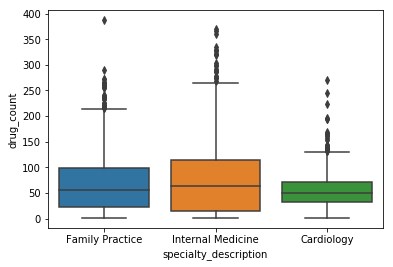

In [29]:
# show that different medical specialties prescribe different numbers of drugs
import seaborn as sb
%matplotlib inline

sb.boxplot(x="specialty_description", y="drug_count", 
           data=prescriber_specialty_df
           [
           (prescriber_specialty_df["specialty_description"] == "Internal Medicine") |
           (prescriber_specialty_df["specialty_description"] == "Family Practice") |
           (prescriber_specialty_df["specialty_description"] == "Cardiology")
           ]
          )

In [30]:
# User pandas crosstab function to create a dataframe where each row is a prescriber identified by their NPI, 
# the columns are the drug generic names, the values are the sum of total_claim_count
npi_generic_cross_df = pd.crosstab(part_d_df_small["npi"], part_d_df_small["generic_name"], values=part_d_df_small["total_claim_count"], 
                                  aggfunc=np.sum)

In [31]:
# To replace the NaN (not a number) from the cells with zero the fillna() method is used.
npi_generic_cross_df = npi_generic_cross_df.fillna(0)

In [32]:
npi_generic_cross_df.head()

generic_name,0.9 % SODIUM CHLORIDE,AA 4.25%/CALCIUM/LYTES/DEX 10%,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,ABATACEPT/MALTOSE,ABIRATERONE ACETATE,ACAMPROSATE CALCIUM,ACARBOSE,...,ZALEPLON,ZIDOVUDINE,ZILEUTON,ZINC ACETATE,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
npi,,,,,,,,,,,,,,,,,,,,,
1003002072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003002858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0
1003012410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003019910,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003020975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# use npi to merge two tables prescriber_specialty_df and npi_generic_cross_df
prescriber_specialty_generic_df = pd.merge(prescriber_specialty_df, npi_generic_cross_df.reset_index(level=["npi"]), on="npi")

In [34]:
prescriber_specialty_generic_df.head()

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,AA 4.25%/CALCIUM/LYTES/DEX 10%,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZALEPLON,ZIDOVUDINE,ZILEUTON,ZINC ACETATE,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
0,1003002072,Urology,237,10,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1003002858,Nurse Practitioner,1793,48,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0
2,1003012410,Family Practice,216,14,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1003019910,Dentist,229,4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003020975,Internal Medicine,1205,43,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
prescriber_specialty_generic_df = prescriber_specialty_generic_df.sort_values(by=["specialty_description", "npi"])

In [36]:
prescriber_specialty_generic_df.head()

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,AA 4.25%/CALCIUM/LYTES/DEX 10%,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZALEPLON,ZIDOVUDINE,ZILEUTON,ZINC ACETATE,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
2016,1083895114,Addiction Medicine,3088,40,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,44.0,0.0,0.0,177.0,0.0,0.0
128,1003878943,Allergy/Immunology,112,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
386,1013919141,Allergy/Immunology,323,9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
409,1013941012,Allergy/Immunology,391,9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
682,1033116801,Allergy/Immunology,196,9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Since the data has been resorted by specialty_desc and npi, index needs to be updated to reflect new order of data
prescriber_specialty_generic_df=prescriber_specialty_generic_df.reset_index(drop=True)
prescriber_specialty_generic_df.head()

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,AA 4.25%/CALCIUM/LYTES/DEX 10%,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZALEPLON,ZIDOVUDINE,ZILEUTON,ZINC ACETATE,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
0,1083895114,Addiction Medicine,3088,40,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,44.0,0.0,0.0,177.0,0.0,0.0
1,1003878943,Allergy/Immunology,112,7,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1013919141,Allergy/Immunology,323,9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1013941012,Allergy/Immunology,391,9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1033116801,Allergy/Immunology,196,9,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
prescriber_specialty_generic_df.shape

(22856, 1173)

In [38]:
# Top 10 NPIs which are the most excluded prescribers
part_d_df_small_exclusion_npi_count = part_d_df_small_exclusion.groupby('npi').count().sort_values('drug_name', ascending=False).iloc[0:10]
part_d_df_small_exclusion_npi_count

,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
npi,,,,,,,,,,,,,,,
1942202841,240,240,240,240,240,240,103,240,240,240,25,158,158,158,240
1215045869,124,124,124,124,124,124,41,124,124,124,6,61,61,61,124
1417959503,94,94,94,94,94,94,27,94,94,94,2,40,40,40,94
1053393405,63,63,63,63,63,63,22,63,63,63,3,38,38,38,63
1285702829,58,58,58,58,58,58,8,58,58,58,4,43,43,43,58
1699840264,50,50,50,50,50,50,20,50,50,50,0,18,18,18,50
1114072444,47,47,47,47,47,47,13,47,47,47,6,35,35,35,47
1093805012,29,29,29,29,29,29,7,29,29,29,0,9,9,9,29
1831276880,25,25,25,25,25,25,0,25,25,25,0,13,13,13,25


In [39]:
# Based on analyzed result, the interested excluded npi is 1942202841
# we need to find out the position of 1942202841 based on this script, the result is 12569
# update the position of the rest of the scripts using 12569
prescriber_specialty_generic_df.loc[prescriber_specialty_generic_df['npi'] == 1053393405]

,npi,specialty_description,total_claim_count,drug_count,0.9 % SODIUM CHLORIDE,AA 4.25%/CALCIUM/LYTES/DEX 10%,ABACAVIR SULFATE,ABACAVIR SULFATE/LAMIVUDINE,ABACAVIR/LAMIVUDINE/ZIDOVUDINE,ABATACEPT,...,ZALEPLON,ZIDOVUDINE,ZILEUTON,ZINC ACETATE,ZIPRASIDONE HCL,ZOLEDRONIC ACID,ZOLMITRIPTAN,ZOLPIDEM TARTRATE,ZONISAMIDE,ZOSTER VACCINE LIVE/PF
409,1053393405,Cardiology,2222,63,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.0,0.0,0.0


In [40]:
#part_d_df_small_exclusion[part_d_df_small_exclusion['specialty_description'] == 'Cardiology']

In [41]:
part_d_df_exclusion.loc[part_d_df_exclusion['npi'] == 1053393405].head()

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded
1281987,1053393405,UNION CITY,NJ,Cardiology,S,ACTONEL,RISEDRONATE SODIUM,NaN,27,762,3655.90,NaN,27.0,762.0,3655.90,1
1281988,1053393405,UNION CITY,NJ,Cardiology,S,ALENDRONATE SODIUM,ALENDRONATE SODIUM,14.0,46,1404,508.17,14.0,46.0,1404.0,508.17,1
1281989,1053393405,UNION CITY,NJ,Cardiology,S,ALPRAZOLAM,ALPRAZOLAM,NaN,13,390,51.48,NaN,NaN,NaN,NaN,1
1281990,1053393405,UNION CITY,NJ,Cardiology,S,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,63.0,213,6810,1499.13,NaN,186.0,6000.0,1355.12,1
1281991,1053393405,UNION CITY,NJ,Cardiology,S,AMLODIPINE BESYLATE-BENAZEPRIL,AMLODIPINE BESYLATE/BENAZEPRIL,NaN,15,450,520.79,NaN,15.0,450.0,520.79,1


Shift from using the Pandas dataframe object to the `numpy.array`. Slice off the columns that are not related to the number of filled prescriptions and convert this to a matrix. The `iloc()` method slices a dataframe by the column and the method `as_matrix()` converts the dataframe into a numpy array.

In [42]:
pf_matrix = prescriber_specialty_generic_df.iloc[: , 4: ].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [43]:
pf_matrix

array([[  0.,   0.,   0., ..., 177.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [67]:
pf_matrix.shape

(22856, 1169)

In [44]:
identifiers_matrix = prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [45]:
generic_array = prescriber_specialty_generic_df.columns[4:]

In [46]:
generic_array

Index(['0.9 % SODIUM CHLORIDE', 'AA 4.25%/CALCIUM/LYTES/DEX 10%',
       'ABACAVIR SULFATE', 'ABACAVIR SULFATE/LAMIVUDINE',
       'ABACAVIR/LAMIVUDINE/ZIDOVUDINE', 'ABATACEPT', 'ABATACEPT/MALTOSE',
       'ABIRATERONE ACETATE', 'ACAMPROSATE CALCIUM', 'ACARBOSE',
       ...
       'ZALEPLON', 'ZIDOVUDINE', 'ZILEUTON', 'ZINC ACETATE', 'ZIPRASIDONE HCL',
       'ZOLEDRONIC ACID', 'ZOLMITRIPTAN', 'ZOLPIDEM TARTRATE', 'ZONISAMIDE',
       'ZOSTER VACCINE LIVE/PF'],
      dtype='object', length=1169)

In [47]:
# to compute the distance between a vector representing the drugs that a prescriber prescribes 
# we need to import the scipy.spatial library.
import scipy.spatial

Normalize the claim count of prescriptions by the total number of claims for the prescriber. Each entry now represent the percentage of total claims that are associated with the prescriber.

In [48]:
np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

array([[3088.],
       [ 112.],
       [ 323.],
       ...,
       [  81.],
       [ 198.],
       [ 253.]])

In [49]:
normalized_pf_matrix = pf_matrix / np.reshape(np.sum(pf_matrix,1), (pf_matrix.shape[0],1))

In [50]:
normalized_pf_matrix.shape

(22856, 1169)

Use the euclidean distance to compute the distance between two prescribers. The results of the pdist() function need to be placed into square form. 

In [51]:
prescriber_dist = scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(normalized_pf_matrix, "euclidean"))

In [52]:
prescriber_dist.shape

(22856, 22856)

As we have sorted the prescribers by their specialty then we expect to see some spatial patterns in the distance matrix. A matrix can be visualized using the `matplotlib` library.

In [53]:
import matplotlib.pyplot as plt

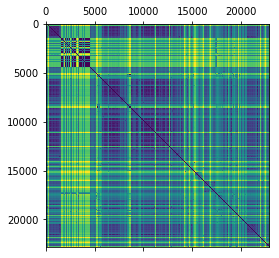

In [54]:
plt.matshow(prescriber_dist)

In [55]:
prescriber_specialty_generic_df.iloc[409,0:4]

npi                      1053393405
specialty_description    Cardiology
total_claim_count              2222
drug_count                       63
Name: 409, dtype: object

In [56]:
providers_sorted = np.lexsort((prescriber_dist[:,409].tolist(),))

In [71]:
prescriber_dist[:,409].tolist()

[0.2924796348678093,
 0.45805971221897607,
 0.47034247124277384,
 0.477834795347633,
 0.4988254068536632,
 0.4331224894417398,
 0.7657087700351601,
 0.4530297729097601,
 0.4853894603547876,
 0.391066523373084,
 0.5442128003733855,
 0.4749357623840072,
 0.46262485116613467,
 0.5952009771345498,
 0.37985697053756184,
 0.36301362346641264,
 0.43797178878555015,
 0.34427156897538197,
 0.46021929291581415,
 0.3777108000049474,
 0.43243208687764256,
 0.35661412456732744,
 0.3297865125265137,
 0.49714752157034947,
 0.4829864376151314,
 0.5538685718794464,
 0.3281304577340583,
 0.3911973113440159,
 0.374245561009272,
 0.31752958988271784,
 0.5981750844662463,
 0.3361209716685234,
 0.34300046257208394,
 0.4752870865516658,
 0.3770911753402072,
 0.4824694190642639,
 0.48210707403427966,
 0.37075808793115883,
 0.3680403621883311,
 0.2998305608359403,
 1.009953133004755,
 0.4483432414156191,
 0.2877365644272953,
 0.3223575407706939,
 0.5248666792108029,
 0.6229056801156777,
 0.443619441870755,
 0.

In [91]:
providers_sorted[0:16]

array([  409,   395, 11899,   850, 12621, 10245, 13773, 11032, 10591,
       10202, 12384,  1101,  9843, 10763, 11485,  9955], dtype=int64)

In [101]:
np.sort(prescriber_dist[409])[providers_sorted[0:16]]

array([0.12270318, 0.12241352, 0.4429385 , 0.12897594, 0.47028465,
       0.38825998, 0.51801186, 0.41266651, 0.39843181, 0.38709718,
       0.46054846, 0.1318678 , 0.37689257, 0.40331791, 0.42697094,
       0.38001302])

In [57]:
# The prescriber referenced at position 6072 is an Internal Medicine. 
# We can now calculate the prescribers most similar to this Internal Medicine.
prescriber_dist[409,:]
np.sort(prescriber_dist[409])[providers_sorted[0:16]]

array([0.12270318, 0.12241352, 0.4429385 , 0.12897594, 0.47028465,
       0.38825998, 0.51801186, 0.41266651, 0.39843181, 0.38709718,
       0.46054846, 0.1318678 , 0.37689257, 0.40331791, 0.42697094,
       0.38001302])

In [58]:
# plotting the distances we can see that prescribers most like are probably also Internal Medicine.
#plt.scatter(np.arange(prescriber_dist.shape[0]),prescriber_dist[6072,:])

In [92]:
dis_range

array([    0,     1,     2, ..., 22853, 22854, 22855])

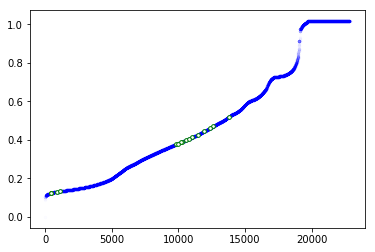

In [103]:
dis_range = np.arange(prescriber_dist.shape[0])
#plt.scatter(np.arange(prescriber_dist.shape[0]),np.sort(prescriber_dist[6072,:]))
plt.scatter(dis_range,np.sort(prescriber_dist[409,:]), color='blue', alpha=0.01, s=7)
plt.scatter(dis_range[providers_sorted[0:1]],np.sort(prescriber_dist[409])[providers_sorted[0:1]], color='red', alpha=1, s=14, edgecolor='red')
plt.scatter(dis_range[providers_sorted[0:16]],np.sort(prescriber_dist[409])[providers_sorted[0:16]], color='white', alpha=1, s=14, edgecolor='green')

In [60]:
#providers_sorted = np.lexsort((prescriber_dist[:,12569].tolist(),))

In [61]:
prescriber_specialty_generic_df.iloc[:,0:2].as_matrix()[providers_sorted[0:16],:]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([[1053393405, 'Cardiology'],
       [1043233513, 'Cardiology'],
       [1750350682, 'Internal Medicine'],
       [1508966219, 'Cardiology'],
       [1952414849, 'Internal Medicine'],
       [1275592735, 'Internal Medicine'],
       [1013244730, 'Nurse Practitioner'],
       [1508848979, 'Internal Medicine'],
       [1386688083, 'Internal Medicine'],
       [1265449326, 'Internal Medicine'],
       [1881730026, 'Internal Medicine'],
       [1811050404, 'Cardiology'],
       [1164469540, 'Internal Medicine'],
       [1437144391, 'Internal Medicine'],
       [1649287756, 'Internal Medicine'],
       [1194760447, 'Internal Medicine']], dtype=object)

In [62]:
np.lexsort(((-1 * pf_matrix[409,:]).tolist(),))[0:16]

array([  54,  716,  717,  240, 1141,  485, 1008,  597,  823,   83,  388,
        986,  651,  689,   30,  364], dtype=int64)

In [63]:
generic_array[np.lexsort(((-1 * pf_matrix[409,:]).tolist(),))][0:16]

Index(['AMLODIPINE BESYLATE', 'METOPROLOL SUCCINATE', 'METOPROLOL TARTRATE',
       'CLOPIDOGREL BISULFATE', 'VALSARTAN/HYDROCHLOROTHIAZIDE', 'GABAPENTIN',
       'SIMVASTATIN', 'ISOSORBIDE MONONITRATE', 'OMEPRAZOLE',
       'ATORVASTATIN CALCIUM', 'ESOMEPRAZOLE MAGNESIUM',
       'ROSUVASTATIN CALCIUM', 'LISINOPRIL', 'METFORMIN HCL',
       'ALENDRONATE SODIUM', 'ENALAPRIL MALEATE'],
      dtype='object')

In [64]:
part_d_df_small[part_d_df_small["npi"]==1053393405].sort_values("total_claim_count", ascending=False)

,npi,nppes_provider_city,nppes_provider_state,specialty_description,description_flag,drug_name,generic_name,bene_count,total_claim_count,total_day_supply,total_drug_cost,bene_count_ge65,total_claim_count_ge65,total_day_supply_ge65,total_drug_cost_ge65,is_excluded,drug_count
1281990,1053393405,UNION CITY,NJ,Cardiology,S,AMLODIPINE BESYLATE,AMLODIPINE BESYLATE,63.0,213,6810,1499.13,NaN,186.0,6000.0,1355.12,1,1
1282027,1053393405,UNION CITY,NJ,Cardiology,S,METOPROLOL SUCCINATE,METOPROLOL SUCCINATE,28.0,110,3540,2816.62,NaN,91.0,2970.0,2396.22,1,1
1282028,1053393405,UNION CITY,NJ,Cardiology,S,METOPROLOL TARTRATE,METOPROLOL TARTRATE,24.0,88,3105,491.56,NaN,NaN,NaN,NaN,1,1
1281999,1053393405,UNION CITY,NJ,Cardiology,S,CLOPIDOGREL,CLOPIDOGREL BISULFATE,22.0,84,3060,4354.49,NaN,69.0,2610.0,3469.53,1,1
1282011,1053393405,UNION CITY,NJ,Cardiology,S,GABAPENTIN,GABAPENTIN,33.0,82,2445,598.16,NaN,66.0,1965.0,479.00,1,1
1282040,1053393405,UNION CITY,NJ,Cardiology,S,SIMVASTATIN,SIMVASTATIN,27.0,78,2640,757.54,NaN,NaN,NaN,NaN,1,1
1282034,1053393405,UNION CITY,NJ,Cardiology,S,OMEPRAZOLE,OMEPRAZOLE,20.0,68,2091,928.75,NaN,NaN,NaN,NaN,1,1
1281993,1053393405,UNION CITY,NJ,Cardiology,S,ATORVASTATIN CALCIUM,ATORVASTATIN CALCIUM,20.0,64,2160,1964.65,NaN,51.0,1770.0,1695.80,1,1
1282031,1053393405,UNION CITY,NJ,Cardiology,S,NEXIUM,ESOMEPRAZOLE MAGNESIUM,15.0,60,1800,12637.43,NaN,NaN,NaN,NaN,1,1
1282001,1053393405,UNION CITY,NJ,Cardiology,S,CRESTOR,ROSUVASTATIN CALCIUM,20.0,56,1860,10428.26,NaN,NaN,NaN,NaN,1,1
